In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import os

In [2]:
!mvn clean package > NUL

Página de códigos activa: 1252


In [3]:
def run_java(args):
    JAR_FILE = "target/IPP-TP2-1.0.jar"
    MAIN_CLASS = "matrix.MatrixMain"

    if not os.path.isfile(JAR_FILE):
        print(f"No se encontró {JAR_FILE}")
        print("Compilando con Maven...")
        !mvn clean package
    
    cmd = ["java"] + args.split() + ["-cp", JAR_FILE, MAIN_CLASS]

    result = subprocess.run(cmd, capture_output=True, text=True)

    if result.returncode != 0:
        print("Error al ejecutar Java:", result.stderr)
        return []

    times = [float(line.strip()) for line in result.stdout.splitlines() if line.strip()]
    return times       

In [17]:
size_values = range(500, 2600, 250)
num_threads = 8
times = 3
types = ['sequential', 'parallel', 'fork_join', 'virtual_per_row', 'virtual_per_chunk']

In [5]:
summary = {}

for t in types:
    summary[t] = {}
    for size in size_values:
        if size > 1000 and t == 'sequential':
            continue
        args = f"-Dsize={size} -DnumThreads={num_threads} -Dtimes={times} -Dtype={t}"
        run_times = run_java(args)
        if run_times:
            mean = np.mean(run_times)
            std = np.std(run_times)
            summary[t][size] = {"mean": mean, "std": std}
            if size > 1000:
                print(f"{t} size {size}: mean={mean:.10f} s, std={std:.10f} s")

parallel size 1250: mean=5.7567330333 s, std=0.2619617836 s
parallel size 1500: mean=10.6385779667 s, std=0.0594612246 s
parallel size 1750: mean=18.9432849333 s, std=0.7445901008 s
parallel size 2000: mean=29.0761793000 s, std=0.0447361003 s
parallel size 2250: mean=44.8789414333 s, std=0.5565121570 s
parallel size 2500: mean=72.6296734667 s, std=0.2769627714 s
fork_join size 1250: mean=5.7771594000 s, std=0.0925665821 s
fork_join size 1500: mean=12.8911169667 s, std=0.7991441662 s
fork_join size 1750: mean=20.0480974333 s, std=0.1516463758 s
fork_join size 2000: mean=31.3162792667 s, std=0.0593082857 s
fork_join size 2250: mean=46.4432019667 s, std=3.2620826941 s
fork_join size 2500: mean=79.8197238333 s, std=7.1470366453 s
virtual_per_row size 1250: mean=6.0548315333 s, std=0.1434645315 s
virtual_per_row size 1500: mean=12.1465420667 s, std=0.0702082868 s
virtual_per_row size 1750: mean=20.3037291000 s, std=0.0082335145 s
virtual_per_row size 2000: mean=31.1106564333 s, std=0.124758

In [8]:
t = "sequential"
for size in range(1250, 2100, 250):
    args = f"-Dsize={size} -DnumThreads={num_threads} -Dtimes={times} -Dtype={t}"
    run_times = run_java(args)
    if run_times:
        mean = np.mean(run_times)
        std = np.std(run_times)
        summary[t][size] = {"mean": mean, "std": std}
        if size > 1000:
            print(f"{t} size {size}: mean={mean:.10f} s, std={std:.10f} s")

for t in types:
    for size in range(2750, 3100, 250):
        if t == 'sequential':
            continue
        args = f"-Dsize={size} -DnumThreads={num_threads} -Dtimes={times} -Dtype={t}"
        run_times = run_java(args)
        if run_times:
            mean = np.mean(run_times)
            std = np.std(run_times)
            summary[t][size] = {"mean": mean, "std": std}
            if size > 1000:
                print(f"{t} size {size}: mean={mean:.10f} s, std={std:.10f} s")

sequential size 1250: mean=9.3577782333 s, std=0.2073150393 s
sequential size 1500: mean=38.1772549667 s, std=7.5294840320 s
sequential size 1750: mean=55.8990379000 s, std=0.5834177086 s
sequential size 2000: mean=98.4931175667 s, std=0.5330438726 s
parallel size 2750: mean=86.4103382000 s, std=5.3313208246 s
parallel size 3000: mean=119.2212514000 s, std=0.0783200391 s
fork_join size 2750: mean=92.3554163333 s, std=0.1463693598 s
fork_join size 3000: mean=122.3280789333 s, std=0.7396699744 s
virtual_per_row size 2750: mean=117.8215018667 s, std=1.1707465977 s
virtual_per_row size 3000: mean=121.4969863667 s, std=1.3735610072 s
virtual_per_chunk size 2750: mean=93.5257851667 s, std=0.8994987091 s
virtual_per_chunk size 3000: mean=127.9068515000 s, std=7.5661923520 s


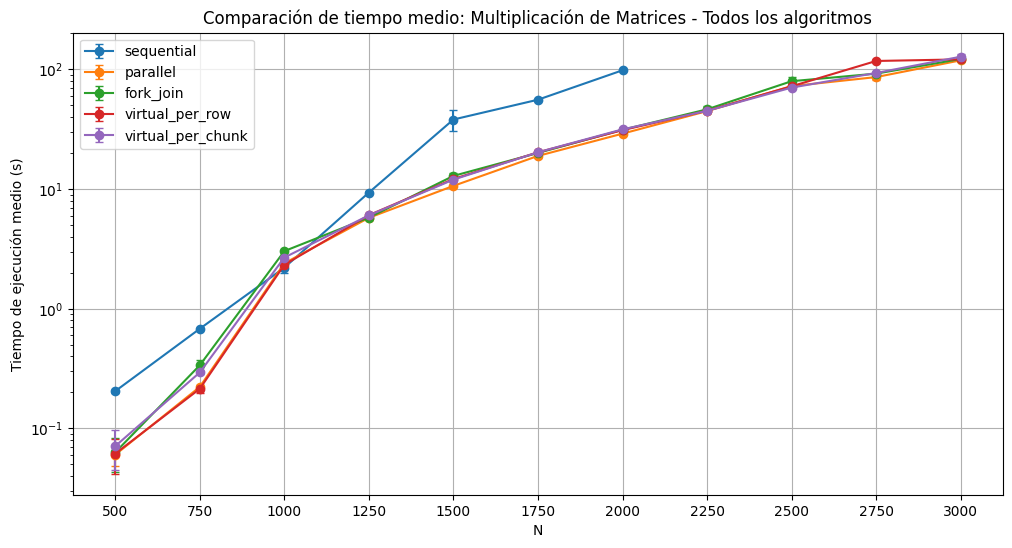

In [18]:
plt.figure(figsize=(12, 6))
for t in types:
    sizes = sorted(summary[t].keys())
    means = [summary[t][s]['mean'] for s in sizes]
    stds = [summary[t][s]['std'] for s in sizes]
    plt.errorbar(sizes, means, yerr=stds, label=t, marker='o', capsize=3)

plt.xticks(range(min(size_values), 3000 + 1, 250))
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title(f"Comparación de tiempo medio: Multiplicación de Matrices - Todos los algoritmos")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))

types = ['sequential', 'parallel', 'fork_join']
for t in types:
    sizes = sorted(summary[t].keys())
    means = [summary[t][s]['mean'] for s in sizes]
    stds = [summary[t][s]['std'] for s in sizes]
    plt.errorbar(sizes, means, yerr=stds, label=t, marker='o', capsize=3)

plt.xticks(range(min(size_values), 3000 + 1, 250))
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title(f"Comparación de tiempo medio: Multiplicación de Matrices Con Threads de procesador")
plt.legend()
plt.grid(True)
plt.show()

In [23]:
sizes = [1000, 1250, 1500, 1750]
thread_values = [1, 2, 4, 6, 8]
types = ['sequential', 'parallel', 'fork_join']
times = 3

summary = {t: {} for t in types}

for t in types:
    for size in sizes:
        summary[t][size] = {}
        if t == "sequential":
            args = f"-Dsize={size} -DnumThreads=1 -Dtimes={times} -Dtype={t}"
            run_times = run_java(args)
            if run_times:
                mean = np.mean(run_times)
                std = np.std(run_times)
                summary[t][size][1] = {"mean": mean, "std": std}
                print(f"{t} size {size}: mean={mean:.6f} s, std={std:.6f} s")
        else:
            # Para parallel y fork_join sí variamos threads
            for num_threads in thread_values:
                args = f"-Dsize={size} -DnumThreads={num_threads} -Dtimes={times} -Dtype={t}"
                run_times = run_java(args)
                if run_times:
                    mean = np.mean(run_times)
                    std = np.std(run_times)
                    summary[t][size][num_threads] = {"mean": mean, "std": std}
                    print(f"{t} size {size}, {num_threads} threads: mean={mean:.6f} s, std={std:.6f} s")

sequential size 1000: mean=4.791800 s, std=0.591553 s
sequential size 1250: mean=8.553468 s, std=0.564882 s
sequential size 1500: mean=27.835653 s, std=0.301357 s
sequential size 1750: mean=55.841574 s, std=1.211650 s
parallel size 1000, 1 threads: mean=4.067052 s, std=0.614614 s
parallel size 1000, 2 threads: mean=4.062521 s, std=1.127068 s
parallel size 1000, 4 threads: mean=1.550466 s, std=0.331690 s
parallel size 1000, 6 threads: mean=1.723713 s, std=0.436950 s
parallel size 1000, 8 threads: mean=2.401618 s, std=0.154431 s
parallel size 1250, 1 threads: mean=9.446454 s, std=0.549513 s
parallel size 1250, 2 threads: mean=9.772646 s, std=0.339863 s
parallel size 1250, 4 threads: mean=6.224092 s, std=1.248000 s
parallel size 1250, 6 threads: mean=4.745103 s, std=0.488517 s
parallel size 1250, 8 threads: mean=4.980462 s, std=0.203500 s
parallel size 1500, 1 threads: mean=30.593013 s, std=1.526948 s
parallel size 1500, 2 threads: mean=26.549000 s, std=0.730354 s
parallel size 1500, 4 th

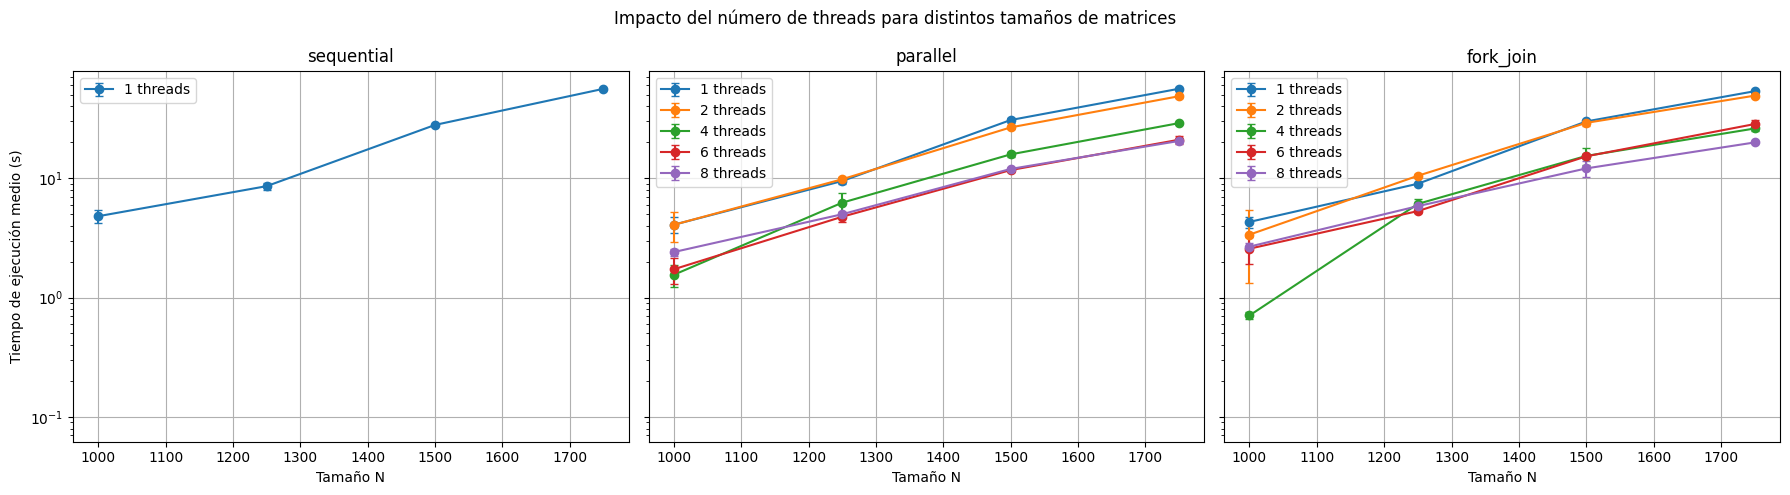

In [27]:
# --- Plot por tipo ---
fig, axes = plt.subplots(1, len(types), figsize=(18, 5), sharey=True)

for ax, t in zip(axes, types):
    for num_threads in sorted({n for s in sizes for n in summary[t][s].keys()}):
        means = [summary[t][size][num_threads]["mean"] for size in sizes if num_threads in summary[t][size]]
        stds = [summary[t][size][num_threads]["std"] for size in sizes if num_threads in summary[t][size]]
        if means:  # puede que sequential solo tenga threads=1
            ax.errorbar(sizes, means, yerr=stds, marker="o", capsize=3, label=f"{num_threads} threads")

    ax.set_xticks(range(1000, 1750 + 1, 250))
    ax.set_title(t)
    ax.set_xlabel("Tamaño N")
    ax.set_xscale("linear")
    ax.set_yscale("log")
    ax.grid(True)
    ax.legend()

axes[0].set_ylabel("Tiempo de ejecución medio (s)")
plt.suptitle("Impacto del número de threads para distintos tamaños de matrices")
plt.tight_layout()
plt.show()